In [245]:
import numpy as np
from scipy.integrate import Radau as RK

In [246]:
def geodesic(tau, y):
    """
    y[0] = t
    y[1] = dt
    y[2] = r
    y[3] = dr
    y[4] = phi
    y[5] = dphi
    y[6] = mass
    
    F[0] = dt
    F[1] = d^2t
    F[2] = dr
    F[3] = d^2r
    F[4] = dphi
    F[5] = d^2phi
    F[6] = mass change (0)
    """
    F = np.zeros_like(y, dtype=float)
    G = 1
    c = 1
    M = y[6]
    R = (2*G*M)/c**2
    F[0] = y[1]
    F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
    F[2] = y[3]
    F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/((y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
    F[4] = y[5]
    F[5] = -(2/y[2])*y[3]*y[5]
    F[6] = 0
    
    return F

In [247]:
def initial_y(t,r,phi,m):
    y = np.zeros(shape = (7))
    G = 1
    c = 1
    dphi = np.sqrt((G*m)/r)
    y[0] = t
    y[1] = np.sqrt(c**2+((r**2)*(dphi**2)))
    y[2] = r
    y[3] = 0
    y[4] = phi
    y[5] = dphi
    y[6] = m
    return y

In [273]:
y = initial_y(0,10,0,1)
print(y)
#y = (0,1,1,0,0,1,1)
print(y)
runga = RK(fun = geodesic, t0 = 0, y0 = y, t_bound = 10, max_step = 0.1, first_step = 0.1, atol = 1e-12, rtol = 1e-12)
y_values = []
t_values = []
num = 0
while(1>0):
    # get solution step state
    runga.step()
    y_values.append(runga.y)
    print(runga.y)
    t_values.append(runga.t)
    # break loop after modeling is finished
    num+=1
    print(num)
    if runga.status == 'finished':
        break
print(y_values)
print(len(y_values))
print(t_values)

[ 0.          3.31662479 10.          0.          0.          0.31622777
  1.        ]
(0, 1, 1, 0, 0, 1, 1)
[0.1 1.  1.  0.  0.1 1.  1. ]
1
[0.2 1.  1.  0.  0.2 1.  1. ]
2
[0.3 1.  1.  0.  0.3 1.  1. ]
3
[0.4 1.  1.  0.  0.4 1.  1. ]
4
[0.5 1.  1.  0.  0.5 1.  1. ]
5
[0.6 1.  1.  0.  0.6 1.  1. ]
6
[0.7 1.  1.  0.  0.7 1.  1. ]
7
[0.8 1.  1.  0.  0.8 1.  1. ]
8
[0.9 1.  1.  0.  0.9 1.  1. ]
9
[1. 1. 1. 0. 1. 1. 1.]
10
[1.1 1.  1.  0.  1.1 1.  1. ]
11
[1.2 1.  1.  0.  1.2 1.  1. ]
12
[1.3 1.  1.  0.  1.3 1.  1. ]
13
[1.4 1.  1.  0.  1.4 1.  1. ]
14
[1.5 1.  1.  0.  1.5 1.  1. ]
15
[1.6 1.  1.  0.  1.6 1.  1. ]
16
[1.7 1.  1.  0.  1.7 1.  1. ]
17
[1.8 1.  1.  0.  1.8 1.  1. ]
18
[1.9 1.  1.  0.  1.9 1.  1. ]
19
[2. 1. 1. 0. 2. 1. 1.]
20
[2.1 1.  1.  0.  2.1 1.  1. ]
21
[2.2 1.  1.  0.  2.2 1.  1. ]
22
[2.3 1.  1.  0.  2.3 1.  1. ]
23
[2.4 1.  1.  0.  2.4 1.  1. ]
24
[2.5 1.  1.  0.  2.5 1.  1. ]
25
[2.6 1.  1.  0.  2.6 1.  1. ]
26
[2.7 1.  1.  0.  2.7 1.  1. ]
27
[2.8 1.  1.  0.  2.8 1.

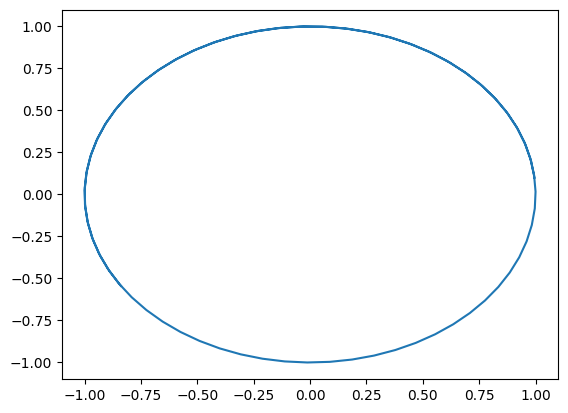

In [274]:
import matplotlib.pyplot as plt
y_values = np.array(y_values)
r = y_values[:,2]
phi = y_values[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
